Dataset: https://www.kaggle.com/datasets/loulouashley/nhsadmissions-and-gp-referrals

Data Source: Quarterly Hospital Activity Data (https://www.england.nhs.uk/statistics/statistical-work-areas/hospital-activity/quarterly-hospital-activity/qar-data/)

Kaggle original: https://www.kaggle.com/code/loulouashley/nhs-time-series-study-admissions-gp-referrals

<< A random practice >>

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from datetime import datetime

%matplotlib inline  
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6
import seaborn as sns

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import itertools


In [2]:
df = pd.read_excel("NHS-Admissions.xls")

In [16]:
df.head(5)

,Year,Month,Day,Specialty Code,Specialty Name,Decisions to Admit,Admissions,Failed to Attend,Removals,Deferred admissions,Patients Suspended,GP Referrals Made,Other Referrals Made,First Attendances Seen,First Attendances DNA,Subsequent Attendances Seen,Subsequent Attendances DNA,date
3,2008,3,1,C_999,Total,1229108,1116562,25313,163881,43875,38526,2716094.000,1.512271e+06,3784347,352345,8100045,1051220,2008-03-01
0,2008,6,1,C_999,Total,1182425,1063433,23595,157446,43986,44532,2655581.000,1.462796e+06,3661937,343937,7854773,1000206,2008-06-01
1,2008,9,1,C_999,Total,1199964,1087367,25920,156115,45368,42254,2643823.264,1.463597e+06,3731940,365462,7883778,1017999,2008-09-01
2,2008,12,1,C_999,Total,1217895,1094776,25081,164242,50124,52006,2552289.424,1.470639e+06,3775186,368552,7969423,1021504,2008-12-01
7,2009,3,1,C_999,Total,1290450,1168811,25957,181311,46660,39622,2788045.000,1.564183e+06,4021017,390378,8605578,1083132,2009-03-01


In [8]:
# combining Year, Month and Day varialbes as a new date variable
df['date'] = pd.to_datetime(df[['Year', 'Month', 'Day']], errors = 'coerce')
df = df.sort_values(by = 'date', ascending = True)

In [9]:
df.shape

(48, 18)

In [12]:
# Checking % of missing values in columns
def check_missing_values(df):
    for col in df.columns:
        pct_missing = np.mean(df[col].isnull())
        print('{} - {}%'.format(col, round(pct_missing*100)))

In [13]:
check_missing_values(df)

Year - 0%
Month - 0%
Day - 0%
Specialty Code - 0%
Specialty Name - 0%
Decisions to Admit - 0%
Admissions - 0%
Failed to Attend - 0%
Removals - 0%
Deferred admissions - 0%
Patients Suspended  - 0%
GP Referrals Made - 0%
Other Referrals Made - 0%
First Attendances Seen - 0%
First Attendances DNA - 0%
Subsequent Attendances Seen - 0%
Subsequent Attendances DNA - 0%
date - 0%


In [15]:
# checking zero values in each variable
(df == 0).sum()

Year                            0
Month                           0
Day                             0
Specialty Code                  0
Specialty Name                  0
Decisions to Admit              0
Admissions                      0
Failed to Attend                0
Removals                        0
Deferred admissions            39
Patients Suspended             39
GP Referrals Made               0
Other Referrals Made            0
First Attendances Seen          0
First Attendances DNA           0
Subsequent Attendances Seen     0
Subsequent Attendances DNA      0
date                            0
dtype: int64

In [17]:
df_dropped = df.drop(['Patients Suspended ','Deferred admissions'], axis = 1) 

In [19]:
df_dropped.shape

(48, 16)

In [20]:
df['Admissions'].describe()

count    4.800000e+01
mean     1.331726e+06
std      1.274778e+05
min      1.063433e+06
25%      1.254063e+06
50%      1.353638e+06
75%      1.443568e+06
max      1.493892e+06
Name: Admissions, dtype: float64

<AxesSubplot:>

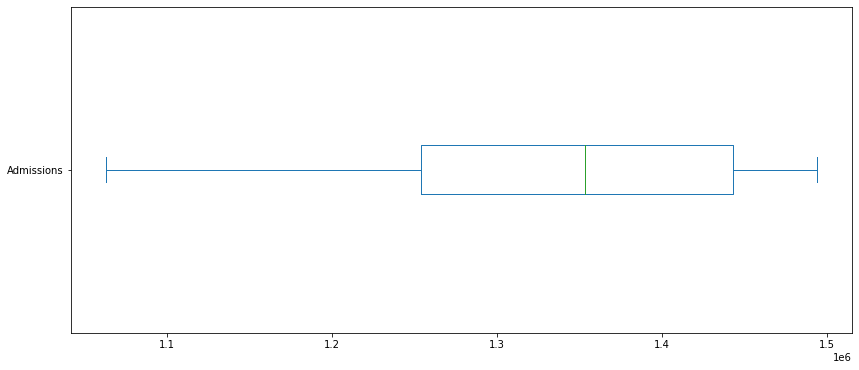

In [21]:
df['Admissions'].plot(kind = 'box', vert = False, figsize = (14, 6))

<AxesSubplot:ylabel='Density'>

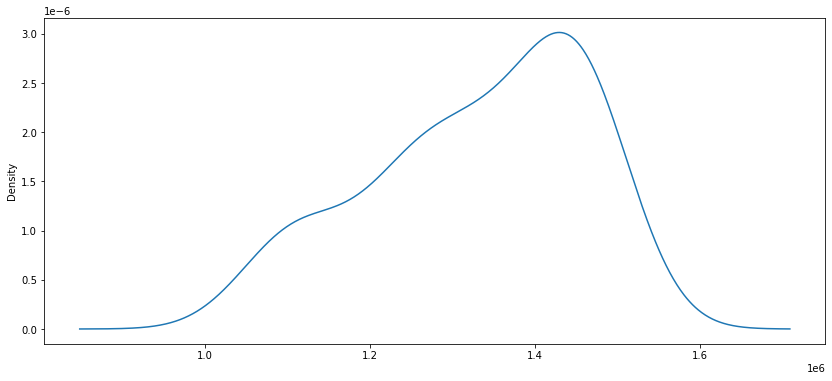

In [22]:
df['Admissions'].plot(kind = 'density', figsize = (14, 6))

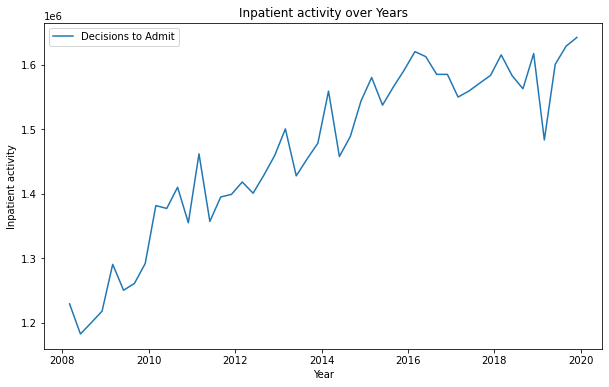

In [23]:
# plot the inpatient activity over years
plt.plot(df['date'], df['Decisions to Admit'], label = "Decisions to Admit")


plt.title("Inpatient activity over Years")
plt.xlabel("Year")
plt.ylabel("Inpatient activity")
plt.legend()
plt.show()